In [2]:
import pandas as pd
bdf = pd.read_csv('bestmovies.csv')
bdf.head()

,Unnamed: 0,Movie,Year,IMDb,Metascore,Votes,Grossprofit,Genre
0,0,Titanic,1997,7.8,75,"978,293.00","659,325,379.00",Drama
1,1,The Departed,2006,8.5,85,"1,101,272.00","132,384,315.00",Crime Drama Thriller
2,2,The Silence of the Lambs,1991,8.6,85,"1,166,416.00","130,742,922.00",Crime Drama Thriller
3,3,Forrest Gump,1994,8.8,82,"1,657,612.00","330,252,182.00",Drama Romance
4,4,Schindler's List,1993,8.9,94,"1,117,170.00","96,898,818.00",Biography Drama History


In [3]:
del bdf['Unnamed: 0']

In [4]:
import mysql.connector 
from mysql.connector import errorcode
import config2
## Connecting to the database
## connecting to the database using 'connect()' method
## it takes 3 required parameters 'host', 'user', 'passwd'
cnx = mysql.connector.connect(
    host = config2.host,
    user = config2.user,
    passwd = 'stephzoe'
)

In [5]:
cursor = cnx.cursor()

db_name = 'Leonardo'
try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name####
    else:
        print(err)
        exit(1)

In [8]:
TABLES = {}

TABLES['bestmoney'] = \
'''CREATE TABLE IF NOT EXISTS bestmoney (
      id int NOT NULL AUTO_INCREMENT PRIMARY KEY, 
      Movie varchar(200) NOT NULL, 
      Year int,
      IMDb int,
      Metascore int,
      Votes int,
      Grossprofit int, 
      Genre varchar(200) NOT NULL
)  ENGINE=INNODB;
'''

In [9]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table bestmoney: OK


In [10]:
subset = bdf[['Movie', 'Year', 'IMDb', 'Metascore', 'Votes', 'Grossprofit', 'Genre']]
tuples = [tuple(x) for x in subset.values]

In [11]:
addboxes = ("INSERT INTO Leonardo.bestmoney" 
               "(Movie, Year, IMDb, Metascore, Votes, Grossprofit, Genre)"
               "VALUES (%s, %s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

,id,Movie,Year,IMDb,Metascore,Votes,Grossprofit,Genre
0,1,Titanic,1997,8,75,978,659,Drama
1,7,The Lord of the Rings: The Return of the King,2003,9,94,1,377,Adventure Drama Fantasy
2,4,Forrest Gump,1994,9,82,1,330,Drama Romance
3,21,Gone with the Wind,1939,8,97,269,198,Drama History Romance
4,14,Dances with Wolves,1990,8,72,224,184,Adventure Drama Western
5,28,Rain Man,1988,8,65,448,178,Drama
6,18,A Beautiful Mind,2001,8,72,787,170,Biography Drama
7,15,The Sound of Music,1965,8,63,186,163,Biography Drama Family
8,36,The Sting,1973,8,83,225,159,Comedy Crime Drama
9,19,Slumdog Millionaire,2008,8,86,758,141,Drama Romance


In [15]:
import matplotlib.pyplot as plt

In [18]:
bdf.head()

,Movie,Year,IMDb,Metascore,Votes,Grossprofit,Genre
0,Titanic,1997,7.8,75,"978,293.00","659,325,379.00",Drama
1,The Departed,2006,8.5,85,"1,101,272.00","132,384,315.00",Crime Drama Thriller
2,The Silence of the Lambs,1991,8.6,85,"1,166,416.00","130,742,922.00",Crime Drama Thriller
3,Forrest Gump,1994,8.8,82,"1,657,612.00","330,252,182.00",Drama Romance
4,Schindler's List,1993,8.9,94,"1,117,170.00","96,898,818.00",Biography Drama History


In [22]:
bdf[['genre1','genre2', 'genre3']] = bdf.Genre.str.split(" ",expand=True,)

In [24]:
del bdf['Genre']

In [27]:
bdf.head()

,Movie,Year,IMDb,Metascore,Votes,Grossprofit,genre1,genre2,genre3
0,Titanic,1997,7.8,75,"978,293.00","659,325,379.00",Drama,None,None
1,The Departed,2006,8.5,85,"1,101,272.00","132,384,315.00",Crime,Drama,Thriller
2,The Silence of the Lambs,1991,8.6,85,"1,166,416.00","130,742,922.00",Crime,Drama,Thriller
3,Forrest Gump,1994,8.8,82,"1,657,612.00","330,252,182.00",Drama,Romance,None
4,Schindler's List,1993,8.9,94,"1,117,170.00","96,898,818.00",Biography,Drama,History


In [30]:
TABLES = {}

TABLES['bestgenres'] = \
'''CREATE TABLE IF NOT EXISTS bestgenres (
      id int NOT NULL AUTO_INCREMENT PRIMARY KEY, 
      Movie varchar(200) NOT NULL, 
      Year int,
      IMDb int,
      Metascore int,
      Votes int,
      Grossprofit int, 
      genre1 varchar(200),
      genre2 varchar(200),
      genre3 varchar(200) NOT NULL
)  ENGINE=INNODB;
'''

In [31]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table bestgenres: OK


In [35]:
bdf['genre3'] = bdf['genre3'].fillna('None')

In [36]:
subset = bdf[['Movie', 'Year', 'IMDb', 'Metascore', 'Votes', 'Grossprofit', 'genre1', 'genre2', 'genre3']]
tuples = [tuple(x) for x in subset.values]

In [37]:
addboxes = ("INSERT INTO Leonardo.bestgenres" 
               "(Movie, Year, IMDb, Metascore, Votes, Grossprofit, genre1, genre2, genre3)"
               "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [45]:
bdf = bdf.drop(46)

In [60]:
cursor.execute("""SELECT *
                      FROM Leonardo.bestgenres
                      WHERE genre1 != 'Action';""")
bigmoney = pd.DataFrame(cursor.fetchall())
bigmoney.columns = [x[0] for x in cursor.description]
bigmoney

,id,Movie,Year,IMDb,Metascore,Votes,Grossprofit,genre1,genre2,genre3
0,1,Titanic,1997,8,75,978,659,Drama,None,None
1,2,The Departed,2006,9,85,1,132,Crime,Drama,Thriller
2,3,The Silence of the Lambs,1991,9,85,1,130,Crime,Drama,Thriller
3,4,Forrest Gump,1994,9,82,1,330,Drama,Romance,None
4,5,Schindler's List,1993,9,94,1,96,Biography,Drama,History
5,6,American Beauty,1999,8,86,1,130,Drama,None,None
6,7,The Lord of the Rings: The Return of the King,2003,9,94,1,377,Adventure,Drama,Fantasy
7,8,One Flew Over the Cuckoo's Nest,1975,9,83,850,112,Drama,None,None
8,9,The Shape of Water,2017,7,87,324,63,Adventure,Drama,Fantasy
9,10,The Godfather: Part II,1974,9,90,1,57,Crime,Drama,None


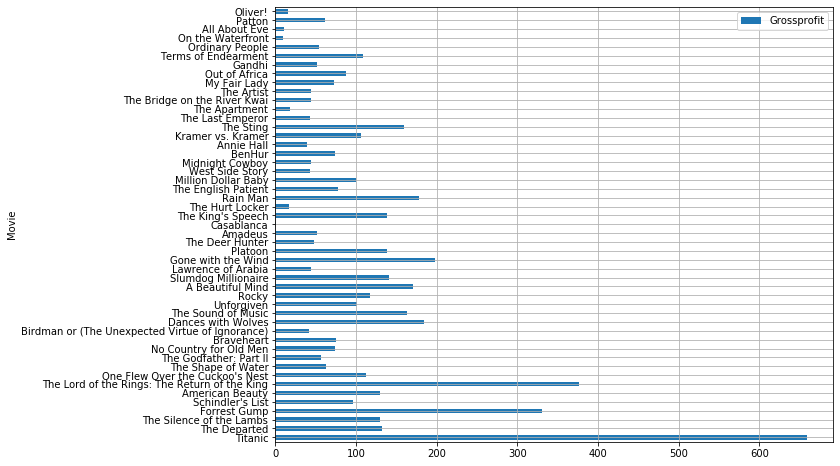

In [61]:
bigmoney.plot.barh(x='Movie', y='Grossprofit', figsize=(10,8), grid=True)

In [56]:
gen = pd.read_csv('AVGg.csv')

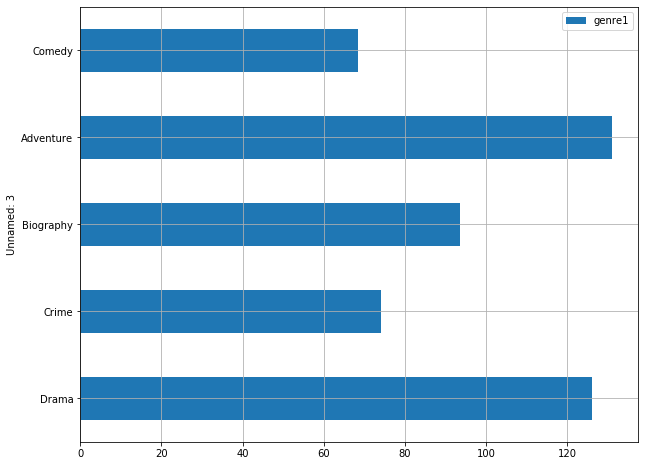

In [58]:
gen.plot.barh(x='Unnamed: 3', y=['genre1'], figsize=(10,8), grid=True)

In [ ]:
cursor.execute("""SELECT *
                      FROM Leonardo.bigmoney
                      ORDER BY Box_Office DESC;""")
bestmoney = pd.DataFrame(cursor.fetchall())
bestmoney.columns = [x[0] for x in cursor.description]
bestmoney.head()

In [ ]:
cursor.execute("""SELECT *
                      FROM Leonardo.bigmoney
                      ORDER BY Box_Office DESC;""")
bestmoney = pd.DataFrame(cursor.fetchall())
bestmoney.columns = [x[0] for x in cursor.description]
bestmoney.head()